In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./casestudy.csv')
df.columns = ['index', 'customer_email', 'net_revenue', 'year']

In [3]:
assert df.shape == (685927, 4)

In [4]:
df.describe()

,index,net_revenue,year
count,685927.000000,685927.000000,685927.000000
mean,342963.000000,125.647755,2016.027252
std,198010.213384,71.854528,0.837203
min,0.000000,1.000000,2015.000000
25%,171481.500000,63.510000,2015.000000
50%,342963.000000,125.730000,2016.000000
75%,514444.500000,187.820000,2017.000000
max,685926.000000,250.000000,2017.000000


In [5]:
df.customer_email = df.customer_email.apply(lambda x: x.strip())

## 	Total revenue for the current year

In [6]:
total = df.groupby('year').net_revenue.sum()
# total

In [7]:
total = total.to_dict()

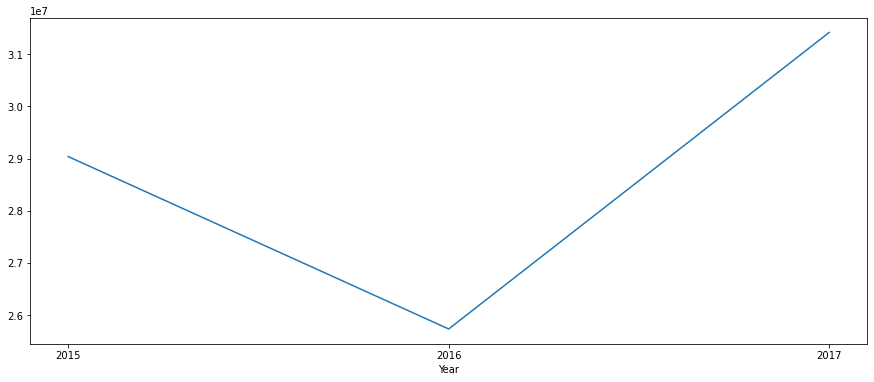

In [8]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x = total.keys(), y = total.values())
ax.set_xlabel('Year')
ax.set_xticks([2015, 2016, 2017])
plt.savefig('./total.png')

## New Customer Revenue 

In [9]:
ncr = {}
for year, series in df.groupby('year'):
    ncr[year] = series[~(series.customer_email.isin(df[df.year == year - 1].customer_email.unique()))].net_revenue.sum()
    print('{}: {}'.format(year, ncr[year]))

2015: 29036749.189999994
2016: 17206366.900000002
2017: 21769213.009999998


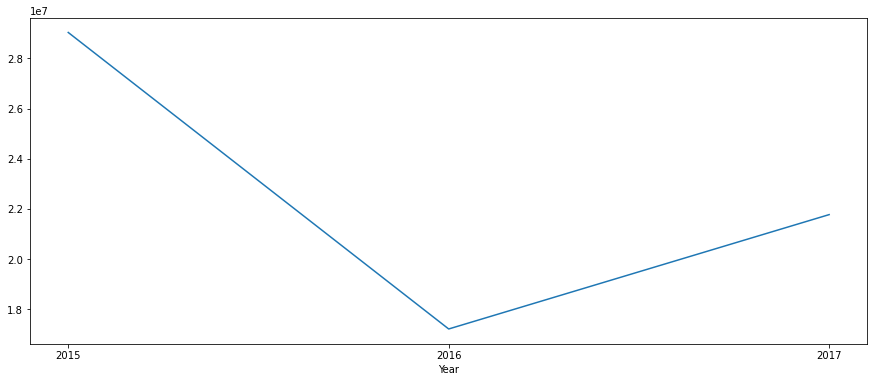

In [10]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x = ncr.keys(), y = ncr.values())
ax.set_xlabel('Year')
ax.set_xticks([2015, 2016, 2017])
plt.savefig('./ncr.png')

## 	Existing Customer Growth

In [11]:
ecg = {}
for year, series in df.groupby('year'):
    ecg[year] = series[(series.customer_email.isin(df[df.year == year - 1].customer_email.unique()))].net_revenue.sum() - \
        df[(df.year == year - 1) & (df.customer_email.isin(series.customer_email.unique()))].net_revenue.sum()
    print('{}: {}'.format(year, ecg[year]))

2015: 0.0
2016: 39043.65000000037
2017: 63857.060000002384


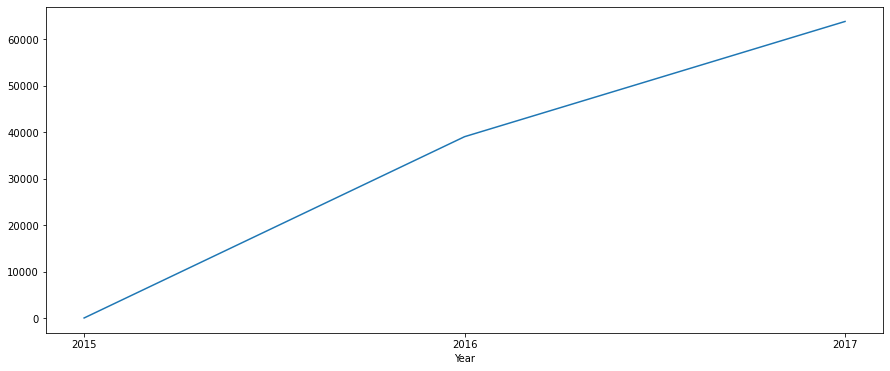

In [12]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x = ecg.keys(), y = ecg.values())
ax.set_xlabel('Year')
ax.set_xticks([2015, 2016, 2017])
plt.savefig('./ecg.png')

## Revenue lost from attrition

In [13]:
lfa = {}
for year, series in df.groupby('year'):
    lfa[year] = df[(df.year == year - 1) & ~(df.customer_email.isin(series.customer_email.unique()))].net_revenue.sum()
    print('{}: {}'.format(year, lfa[year]))

2015: 0.0
2016: 20551216.150000002
2017: 16146518.63


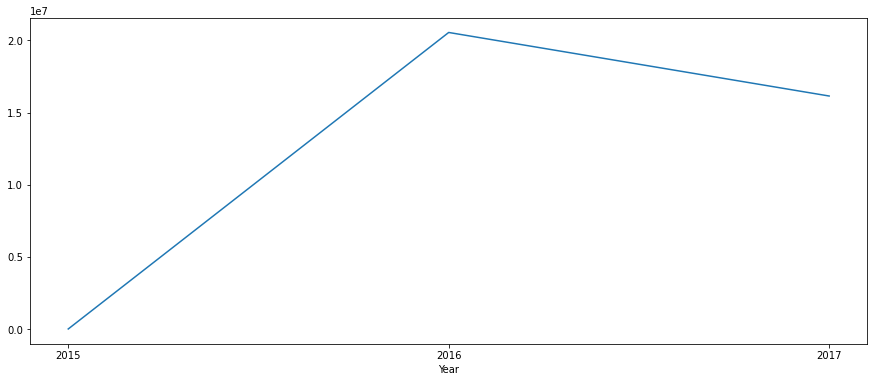

In [14]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x = lfa.keys(), y = lfa.values())
ax.set_xlabel('Year')
ax.set_xticks([2015, 2016, 2017])
plt.savefig('./lfa.png')

In [17]:
for year in list(total.keys())[1:]:
    assert abs(total.get(year-1) + ncr[year] + ecg[year] - lfa[year] - total.get(year)) < 0.01

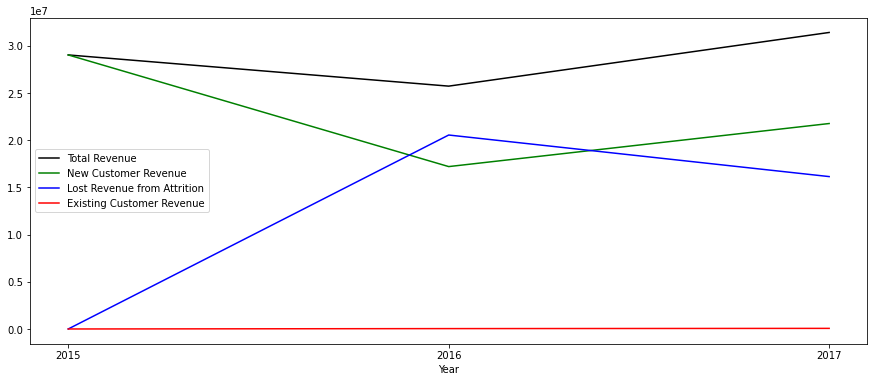

In [16]:
y = [list(total.values()), list(ncr.values()), list(ecg.values()), list(lfa.values())]
x = list(total.keys())
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = list(total.keys()), y = list(total.values()), ax=ax, color='k', label = 'Total Revenue')
sns.lineplot(x = list(ncr.keys()), y = list(ncr.values()), ax=ax, color='g', label = 'New Customer Revenue')
sns.lineplot(x = list(lfa.keys()), y = list(lfa.values()), ax=ax, color='b', label = 'Lost Revenue from Attrition')
sns.lineplot(x = list(ecg.keys()), y = list(ecg.values()), ax=ax, color='r', label = 'Existing Customer Revenue')
plt.legend()
ax.set_xlabel('Year')
ax.set_xticks([2015, 2016, 2017])
# plt.show()
plt.savefig('./revenue.png')

## Existing customer revenue

In [91]:
ecr = {}
for year, series in df.groupby('year'):
    ecr[year] = series[(series.customer_email.isin(df[df.year == year - 1].customer_email.unique()))].net_revenue.sum()
    print('{}: {}'.format(year, ecr[year]))

2015: 0.0
2016: 8524576.69
2017: 9648282.020000001


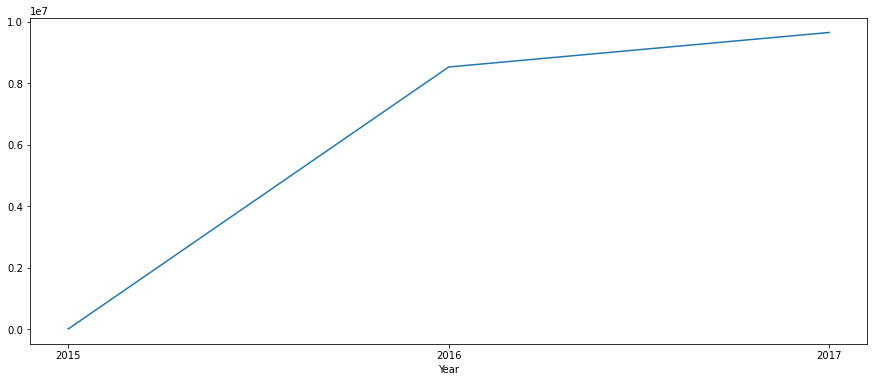

In [182]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x = ecr.keys(), y = ecr.values())
ax.set_xlabel('Year')
ax.set_xticks([2015, 2016, 2017])
plt.savefig('./ecr.png')

## Existing customer revenue of last year

In [92]:
ecr_l = {}
for year, series in df.groupby('year'):
    ecr_l[year] = df[(df.year == year - 1) & (df.customer_email.isin(series.customer_email.unique()))].net_revenue.sum()
    print('{}: {}'.format(year, ecr_l[year]))

2015: 0.0
2016: 8485533.04
2017: 9584424.959999999


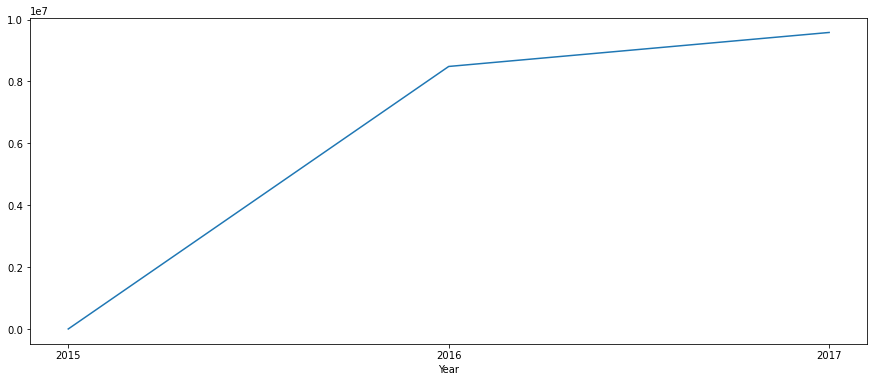

In [183]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x = ecr_l.keys(), y = ecr_l.values())
ax.set_xlabel('Year')
ax.set_xticks([2015, 2016, 2017])
plt.savefig('./ecr_l.png')

## Total Customers Current Year

In [187]:
tc = df.groupby('year').customer_email.nunique()
# tc

year
2015    231294
2016    204646
2017    249987
Name: customer_email, dtype: int64

In [188]:
tc = tc.to_dict()

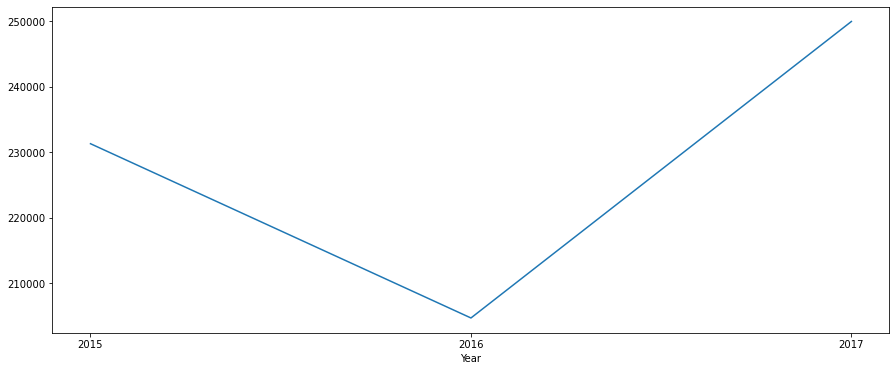

In [189]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x = tc.keys(), y = tc.values())
ax.set_xlabel('Year')
ax.set_xticks([2015, 2016, 2017])
plt.savefig('./tc.png')

## Total Customers Previous Year

In [103]:
cly = {}
for year, series in df.groupby('year'):
    cly[year] = df[df.year == year - 1].customer_email.nunique()
    print('{}: {}'.format(year, cly[year]))

2015: 0
2016: 231294
2017: 204646


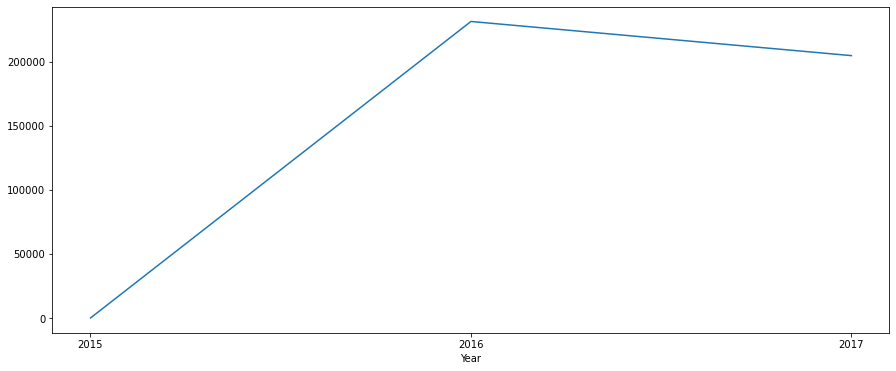

In [190]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x = cly.keys(), y = cly.values())
ax.set_xlabel('Year')
ax.set_xticks([2015, 2016, 2017])
plt.savefig('./cly.png')

## New Customers

In [105]:
nc = {}
for year, series in df.groupby('year'):
    nc[year] = series[~(series.customer_email.isin(df[df.year == year - 1].customer_email.unique()))].customer_email.nunique()
    print('{}: {}'.format(year, nc[year]))

2015: 231294
2016: 136891
2017: 173449


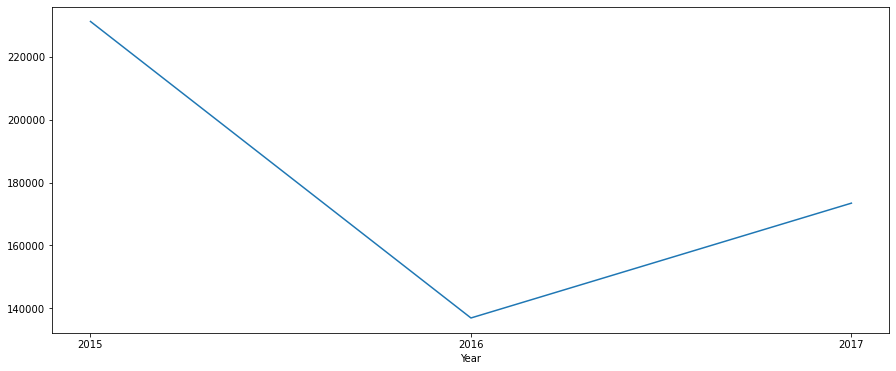

In [191]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x = nc.keys(), y = nc.values())
ax.set_xlabel('Year')
ax.set_xticks([2015, 2016, 2017])
plt.savefig('./nc.png')

## Lost Customers

In [106]:
lc = {}
for year, series in df.groupby('year'):
    lc[year] = df[(df.year == year - 1) & ~(df.customer_email.isin(series.customer_email.unique()))].customer_email.nunique()
    print('{}: {}'.format(year, lc[year]))

2015: 0
2016: 163539
2017: 128108


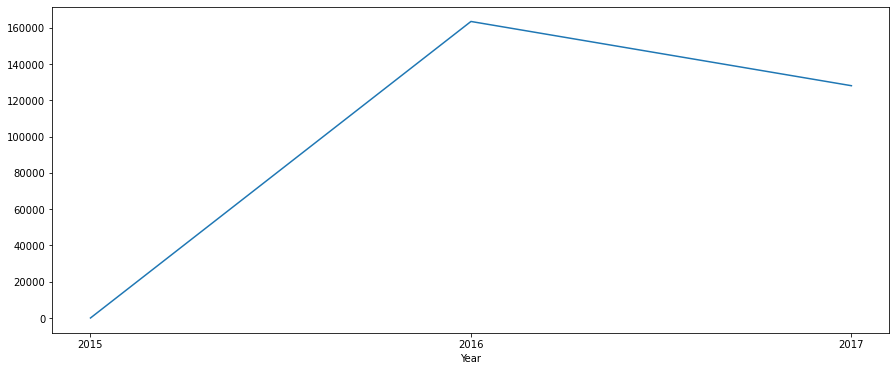

In [192]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x = lc.keys(), y = lc.values())
ax.set_xlabel('Year')
ax.set_xticks([2015, 2016, 2017])
plt.savefig('./lc.png')